# COMPOSITE EXPLAINABILITY

In [1]:
import pandas as pd

df = pd.read_csv('tmp/extracted_data_processed.csv')
X = df.iloc[:,:-1]
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]
X = X.drop(columns=['id'])
y = df.iloc[:,-1]
y.unique()

array([1, 0], dtype=int64)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.8500000000000001, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.9000000000000001)
)

In [ ]:
import shap
from sklearn.model_selection import train_test_split

shap.initjs()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

exported_pipeline.fit(X_train, y_train)

explainer = shap.KernelExplainer(exported_pipeline.predict_proba, X_train, link="identity")
shap_values = explainer.shap_values(X_test, nsamples=100)

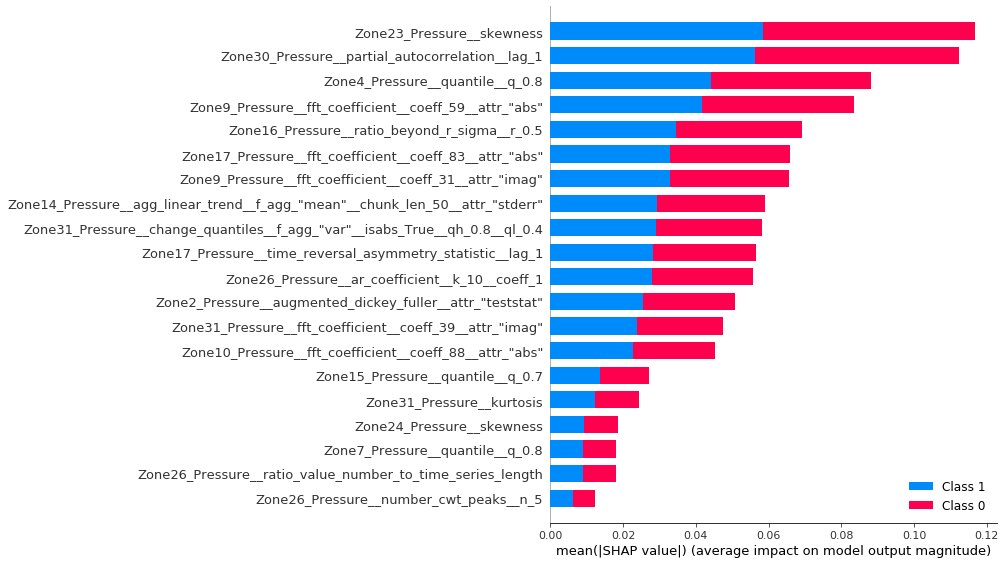

In [33]:
shap.summary_plot(shap_values, X)